In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("wei_crime_file.csv")

In [3]:
df.head()

,Unnamed: 0,Date,DayOfWeek,PdDistrict,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,...,EvictionNos,house_listings_sum,Dom_median,Dom_mean,Dom_min,Dom_max,Sale_median,Sale_mean,Sale_min,Sale_max
0,0,01/01/2013,Tuesday,BAYVIEW,3,1,1,13,16,2,...,0.0,505.0,21.25,24.600000,13.0,46.0,546000.0,6.141000e+05,368000.0,1275000.0
1,1,01/01/2013,Tuesday,CENTRAL,1,0,0,6,15,0,...,0.0,131.0,17.75,19.000000,11.0,32.0,894000.0,8.921667e+05,475000.0,1300000.0
2,2,01/01/2013,Tuesday,INGLESIDE,3,1,0,12,12,2,...,0.0,130.0,16.00,18.050000,12.5,30.5,583000.0,6.355000e+05,533000.0,887000.0
3,3,01/01/2013,Tuesday,MISSION,2,2,0,12,13,3,...,0.0,137.0,16.00,17.700000,12.0,28.5,1000000.0,1.036800e+06,804000.0,1365000.0
4,4,01/01/2013,Tuesday,NORTHERN,2,1,0,6,15,0,...,0.0,147.0,19.50,20.277778,12.0,33.0,1183000.0,1.099778e+06,543000.0,1435000.0


In [2]:
df_sruthi = pd.read_csv('sruthi_finaldatapart2.csv')

In [3]:
df_sruthi.head()

,Date,DayOfWeek,PdDistrict,Time,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,...,daytime_flag,house_listings_sum,Dom_median,Dom_mean,Dom_min,Dom_max,Sale_median,Sale_mean,Sale_min,Sale_max
0,1/1/2013,Tuesday,BAYVIEW,0,0,0,0,4,1,2,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
1,1/1/2013,Tuesday,BAYVIEW,1,2,0,0,1,1,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
2,1/1/2013,Tuesday,BAYVIEW,2,0,0,0,0,1,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
3,1/1/2013,Tuesday,BAYVIEW,3,0,0,0,0,1,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
4,1/1/2013,Tuesday,BAYVIEW,5,0,0,0,1,0,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000


## Exploration

In [7]:
df_sruthi['year'] = df_sruthi['Date'].apply(lambda x: x[-4:])

In [10]:
df_sruthi.columns

Index(['Date', 'DayOfWeek', 'PdDistrict', 'Time', 'new_cat_domestic',
       'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 'new_cat_public',
       'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district',
       'sunrise_time', 'sunset_time', 'daylight_hours', 'EvictionNos', 'year',
       'daytime_flag', 'house_listings_sum', 'Dom_median', 'Dom_mean',
       'Dom_min', 'Dom_max', 'Sale_median', 'Sale_mean', 'Sale_min',
       'Sale_max'],
      dtype='object')

In [12]:
year_crime = df_sruthi.groupby('year')[['new_cat_domestic',
       'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 'new_cat_public',
       'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']].agg('sum').reset_index()

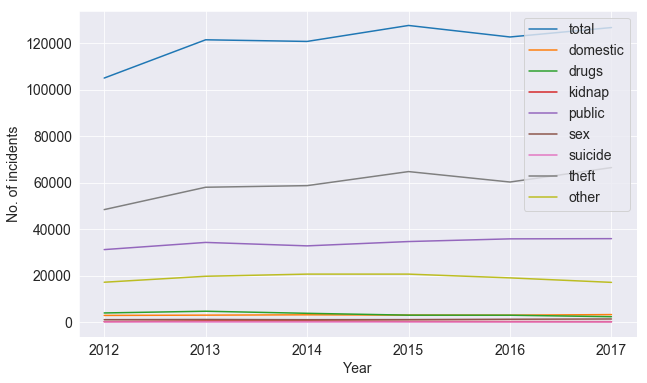

In [28]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,6))
plt.plot(year_crime['year'],year_crime['sum_crime_district'], label='total')
plt.plot(year_crime['year'],year_crime['new_cat_domestic'], label='domestic')
plt.plot(year_crime['year'],year_crime['new_cat_drug'], label='drugs')
plt.plot(year_crime['year'],year_crime['new_cat_kidnap'], label='kidnap')
plt.plot(year_crime['year'],year_crime['new_cat_public'], label='public')
plt.plot(year_crime['year'],year_crime['new_cat_sex'], label='sex')
plt.plot(year_crime['year'],year_crime['new_cat_suicide'], label='suicide')
plt.plot(year_crime['year'],year_crime['new_cat_theft'], label='theft')
plt.plot(year_crime['year'],year_crime['new_cat_others'], label='other')
plt.ylabel('No. of incidents')
plt.xlabel('Year')
plt.legend(loc=1)

In [29]:
day_crime = df_sruthi.groupby('DayOfWeek')[['new_cat_domestic',
       'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 'new_cat_public',
       'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']].agg('sum').reset_index()

In [32]:
day_crime

,DayOfWeek,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,new_cat_suicide,new_cat_theft,sum_crime_district
0,Friday,3186,2887,300,17356,30353,1147,63,56268,111560
1,Monday,2605,2893,291,16418,28030,819,75,48955,100086
2,Saturday,2532,2565,327,15400,30438,954,72,54103,106391
3,Sunday,2194,2570,339,14555,29571,835,60,48533,98657
4,Thursday,2570,3183,245,16379,28424,1322,55,49883,102061
5,Tuesday,2621,3191,266,16871,28319,933,69,48690,100960
6,Wednesday,2586,3447,254,17291,29420,937,59,49973,103967


In [39]:
day_crime['sort'] = [5,1,6,0,4,2,3]

In [43]:
day_crime = day_crime.sort_values('sort')

Text(0.5, 0, 'DayOfWeek')

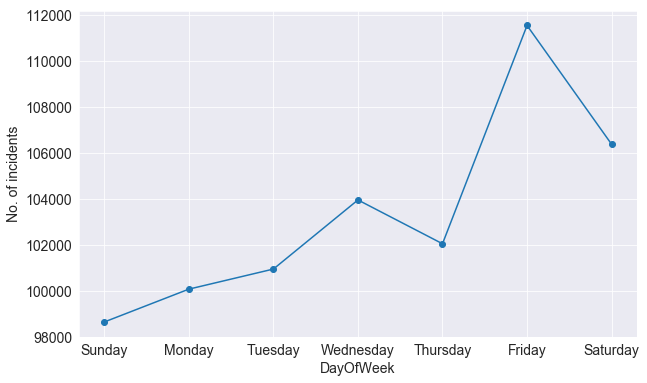

In [63]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,6))
plt.plot(day_crime['DayOfWeek'],day_crime['sum_crime_district'],'o-', label='total')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_domestic'], label='domestic')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_drug'], label='drugs')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_kidnap'], label='kidnap')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_public'], label='public')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_sex'], label='sex')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_suicide'], label='suicide')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_theft'], label='theft')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_others'], label='other')
plt.ylabel('No. of incidents')
plt.xlabel('DayOfWeek')
# plt.legend(loc=1)

In [45]:
hour_crime = df_sruthi.groupby('Time')[['new_cat_domestic',
       'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 'new_cat_public',
       'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']].agg('sum').reset_index()

In [48]:
hour_crime

,Time,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,new_cat_suicide,new_cat_theft,sum_crime_district
0,0,721,796,143,8272,10718,786,19,15899,37354
1,1,284,475,102,3252,7812,460,12,9720,22117
2,2,255,395,90,2610,6914,356,13,7169,17802
3,3,143,298,77,1899,4542,247,7,5222,12435
4,4,107,213,40,1454,3057,131,8,3852,8862
5,5,168,137,42,1181,2772,95,8,3620,8023
6,6,319,298,25,1563,4009,69,14,4528,10825
7,7,843,570,51,2862,5739,99,13,6389,16566
8,8,1090,740,64,4594,7369,257,20,10268,24402
9,9,1088,835,72,4986,7767,175,25,12170,27118


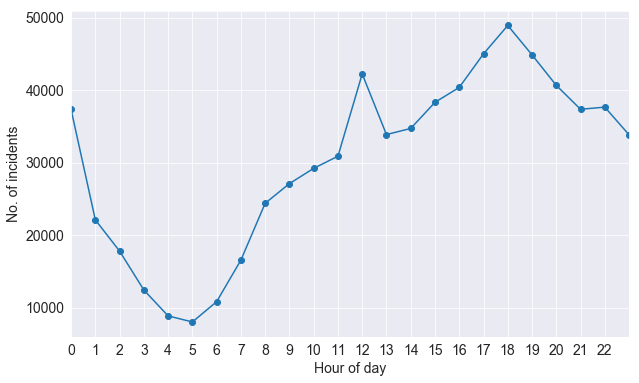

In [62]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10,6))
plt.plot(hour_crime['Time'],hour_crime['sum_crime_district'], 'o-', label='total')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_domestic'], label='domestic')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_drug'], label='drugs')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_kidnap'], label='kidnap')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_public'], label='public')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_sex'], label='sex')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_suicide'], label='suicide')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_theft'], label='theft')
# plt.plot(day_crime['DayOfWeek'],day_crime['new_cat_others'], label='other')
plt.ylabel('No. of incidents')
plt.xlabel('Hour of day')
plt.xlim(0,23,1)
plt.xticks(np.arange(0, 23, step=1))
plt.show()

In [4]:
df_sruthi.sum(axis=0)

Date                  1/1/20131/1/20131/1/20131/1/20131/1/20131/1/20...
DayOfWeek             TuesdayTuesdayTuesdayTuesdayTuesdayTuesdayTues...
PdDistrict            BAYVIEWBAYVIEWBAYVIEWBAYVIEWBAYVIEWBAYVIEWBAYV...
Time                                                            4042215
new_cat_domestic                                                  18294
new_cat_drug                                                      20736
new_cat_kidnap                                                     2022
new_cat_others                                                   114270
new_cat_public                                                   204555
new_cat_sex                                                        6947
new_cat_suicide                                                     453
new_cat_theft                                                    356405
sum_crime_district                                               723682
sunrise_time                                                2.04

In [ ]:
df.columns

In [ ]:
df.tail()

In [ ]:
df.shape, df_sruthi.shape

In [ ]:
314307/24

In [6]:
test = df_sruthi.groupby(['Date','PdDistrict'])[['new_cat_domestic',
       'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 'new_cat_public',
       'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']].agg('sum').reset_index()

In [7]:
df.head()

,Unnamed: 0,Date,DayOfWeek,PdDistrict,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,...,EvictionNos,house_listings_sum,Dom_median,Dom_mean,Dom_min,Dom_max,Sale_median,Sale_mean,Sale_min,Sale_max
0,0,01/01/2013,Tuesday,BAYVIEW,3,1,1,13,16,2,...,0.0,505.0,21.25,24.600000,13.0,46.0,546000.0,6.141000e+05,368000.0,1275000.0
1,1,01/01/2013,Tuesday,CENTRAL,1,0,0,6,15,0,...,0.0,131.0,17.75,19.000000,11.0,32.0,894000.0,8.921667e+05,475000.0,1300000.0
2,2,01/01/2013,Tuesday,INGLESIDE,3,1,0,12,12,2,...,0.0,130.0,16.00,18.050000,12.5,30.5,583000.0,6.355000e+05,533000.0,887000.0
3,3,01/01/2013,Tuesday,MISSION,2,2,0,12,13,3,...,0.0,137.0,16.00,17.700000,12.0,28.5,1000000.0,1.036800e+06,804000.0,1365000.0
4,4,01/01/2013,Tuesday,NORTHERN,2,1,0,6,15,0,...,0.0,147.0,19.50,20.277778,12.0,33.0,1183000.0,1.099778e+06,543000.0,1435000.0


In [10]:
df_sruthi.head()

,Date,DayOfWeek,PdDistrict,Time,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,...,daytime_flag,house_listings_sum,Dom_median,Dom_mean,Dom_min,Dom_max,Sale_median,Sale_mean,Sale_min,Sale_max
0,1/1/2013,Tuesday,BAYVIEW,0,0,0,0,4,1,2,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
1,1/1/2013,Tuesday,BAYVIEW,1,2,0,0,1,1,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
2,1/1/2013,Tuesday,BAYVIEW,2,0,0,0,0,1,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
3,1/1/2013,Tuesday,BAYVIEW,3,0,0,0,0,1,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000
4,1/1/2013,Tuesday,BAYVIEW,5,0,0,0,1,0,0,...,0,505,21.25,24.6,13.0,46.0,546000,614100.0,368000,1275000


In [5]:
model_df = pd.get_dummies(df_sruthi, columns=["DayOfWeek", "PdDistrict"])

In [6]:
model_df.shape

(314307, 43)

In [16]:
model_df.head()

,Date,Time,new_cat_domestic,new_cat_drug,new_cat_kidnap,new_cat_others,new_cat_public,new_cat_sex,new_cat_suicide,new_cat_theft,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,1/1/2013,0,0,0,0,4,1,2,0,5,...,1,0,0,0,0,0,0,0,0,0
1,1/1/2013,1,2,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1/1/2013,2,0,0,0,0,1,0,0,2,...,1,0,0,0,0,0,0,0,0,0
3,1/1/2013,3,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1/1/2013,5,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
model_df.columns

Index(['Date', 'Time', 'new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap',
       'new_cat_others', 'new_cat_public', 'new_cat_sex', 'new_cat_suicide',
       'new_cat_theft', 'sum_crime_district', 'sunrise_time', 'sunset_time',
       'daylight_hours', 'EvictionNos', 'year', 'daytime_flag',
       'house_listings_sum', 'Dom_median', 'Dom_mean', 'Dom_min', 'Dom_max',
       'Sale_median', 'Sale_mean', 'Sale_min', 'Sale_max', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN'],
      dtype='object')

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [8]:
X =  model_df[['Time','sunrise_time', 'sunset_time',
       'daylight_hours', 'EvictionNos', 'daytime_flag', 'house_listings_sum', 'Dom_median',
       'Dom_mean', 'Dom_min', 'Dom_max', 'Sale_median', 'Sale_mean',
       'Sale_min', 'Sale_max', 'DayOfWeek_Friday', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'PdDistrict_BAYVIEW',
       'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION',
       'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND',
       'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']]

In [9]:
y = model_df[['new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 
     'new_cat_public', 'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']]

In [21]:
from sklearn.model_selection import GridSearchCV

def algorithm_run(parameters, classifier, X, y):
    grid = GridSearchCV(classifier, parameters, scoring="neg_mean_absolute_error",cv=5)
    grid.fit(X, y)
    bestparams = grid.best_params_
    bestscore = grid.best_score_
    print(bestparams, bestscore)
    return bestparams, bestscore

## Linear regression

In [22]:
def run_linearregression_cv(X, y):
    
    X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.20, random_state=2019)
    
    y_feats = ['new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 
     'new_cat_public', 'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']
        
    from sklearn.linear_model import LinearRegression
    
    lr_parameters = {"normalize": [True, False]
                 }
    
    test_mae_list = []
    train_mae_list = []
    
    for i in y_feats:
        
        y_train = y_train_all[i]
        y_test = y_test_all[i]
        lr_bestparams, lr_bestscore = algorithm_run(lr_parameters, LinearRegression(), X_train, y_train)
        lr = LinearRegression(**lr_bestparams)
        lr.fit(X_train, y_train)
        lr_score = lr.score(X_train, y_train)

        lr_test_predictions = lr.predict(X_test)
        lr_train_predictions = lr.predict(X_train)
        lr_test_mae = mean_absolute_error(y_test, lr_test_predictions)
        lr_train_mae = mean_absolute_error(y_train, lr_train_predictions)
        test_mae_list.append(lr_test_mae)
        train_mae_list.append(lr_train_mae)
        
        print("For {}, test mae = {}, train mae = {}.".format(str(i), str(lr_test_mae), str(lr_train_mae)))
        
    results_df = pd.DataFrame({"y": y_feats, "test MAE": test_mae_list, "train MAE": train_mae_list})
        
    return results_df

In [25]:
lr_res = run_linearregression_cv(X, y)

{'normalize': False} -0.10933278433228541
For new_cat_domestic, test mae = 0.10854212556624356, train mae = 0.10931511411627669.
{'normalize': False} -0.1205151074823146
For new_cat_drug, test mae = 0.12006053107066778, train mae = 0.12049896929759711.
{'normalize': True} -0.012566704679799878
For new_cat_kidnap, test mae = 0.01306702283498974, train mae = 0.012502655549362187.
{'normalize': True} -0.4973053828704075
For new_cat_others, test mae = 0.4947854924666954, train mae = 0.4972587720320299.
{'normalize': True} -0.6665124559538057
For new_cat_public, test mae = 0.6674431419324012, train mae = 0.6664406842119086.
{'normalize': False} -0.042715314280209936
For new_cat_sex, test mae = 0.043433185204473305, train mae = 0.04270454822052045.
{'normalize': False} -0.0028224518658499817
For new_cat_suicide, test mae = 0.0029670771276517505, train mae = 0.0028205436200899312.
{'normalize': False} -0.7872179780654681
For new_cat_theft, test mae = 0.784438182820672, train mae = 0.787102959

## Random forest

In [26]:
X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.20, random_state=2019)
    
y_feats = ['new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 
 'new_cat_public', 'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']

from sklearn.ensemble import RandomForestRegressor
    

In [29]:
def run_randomforest_cv(X, y):
    
    X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.20, random_state=2019)
    
    y_feats = ['new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 
     'new_cat_public', 'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']
        
    from sklearn.ensemble import RandomForestRegressor
    
    rf_parameters = {"n_estimators" : [2, 3, 5, 10], 
                     "criterion" : ["mse"], 
                     "max_depth" : [5, 6, 8], 
                     "min_samples_split" : [2, 3, 4, 5], 
                     "min_samples_leaf" : [2, 3, 4],
                     "random_state" : [2019]
                 }
    
    test_mae_list = []
    train_mae_list = []
    
    for i in y_feats:
        
        y_train = y_train_all[i]
        y_test = y_test_all[i]
        rf_bestparams, rf_bestscore = algorithm_run(rf_parameters, RandomForestRegressor(), X_train, y_train)
        rf = RandomForestRegressor(**rf_bestparams)
        rf.fit(X_train, y_train)
        rf_score = rf.score(X_train, y_train)

        rf_test_predictions = rf.predict(X_test)
        rf_train_predictions = rf.predict(X_train)
        rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)
        rf_train_mae = mean_absolute_error(y_train, rf_train_predictions)
        test_mae_list.append(rf_test_mae)
        train_mae_list.append(rf_train_mae)
        
        print("For {}, test mae = {}, train mae = {}.".format(str(i), str(rf_test_mae), str(rf_train_mae)))
        
    results_df = pd.DataFrame({"y": y_feats, "test MAE": test_mae_list, "train MAE": train_mae_list})
        
    return results_df

In [30]:
rf_res = run_randomforest_cv(X, y)

{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 2, 'random_state': 2019} -0.10845537226905304
For new_cat_domestic, test mae = 0.1076897136801118, train mae = 0.10778815658993822.
{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 2, 'random_state': 2019} -0.11741832869245453
For new_cat_drug, test mae = 0.11716667141726729, train mae = 0.11648759012111572.
{'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 2019} -0.012443461688082308
For new_cat_kidnap, test mae = 0.013078925297284563, train mae = 0.01244707130346357.
{'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 2019} -0.4908255256212253
For new_cat_others, test mae = 0.4877281489474112, train mae = 0.48809652160408074.


KeyboardInterrupt: 

In [27]:
# y_train = y_train_all['sum_crime_district']
# y_test = y_test_all['sum_crime_district']
# rf = RandomForestRegressor(n_estimators=10, max_depth=8)
# rf.fit(X_train, y_train)
# rf_score = rf.score(X_train, y_train)

## Gradient boosting

In [ ]:
def run_gradientboosting_cv(X, y):
    
    X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.20, random_state=2019)
    
    y_feats = ['new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 
     'new_cat_public', 'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']
        
    from sklearn.ensemble import GradientBoostingRegressor
    
    gbr_parameters = {"learning_rate" : [0.02, 0.05, 0.1],
                      "max_depth" : [4, 6, 8],
                      "max_features" : [1.0, 0.3, 0.1], 
                      "min_samples_split" : [2, 3, 4],
                      "random_state" : [2019]
                 }
    
    test_mae_list = []
    train_mae_list = []
    
    for i in y_feats:
        
        y_train = y_train_all[i]
        y_test = y_test_all[i]
        gbr_bestparams, gbr_bestscore = algorithm_run(gbr_parameters, GradientBoostingRegressor(), X_train, y_train)
        gbr = GradientBoostingRegressor(**gbr_bestparams)
        gbr.fit(X_train, y_train)
        gbr_score = gbr.score(X_train, y_train)

        gbr_test_predictions = gbr.predict(X_test)
        gbr_train_predictions = gbr.predict(X_train)
        gbr_test_mae = mean_absolute_error(y_test, gbr_test_predictions)
        gbr_train_mae = mean_absolute_error(y_train, gbr_train_predictions)
        test_mae_list.append(gbr_test_mae)
        train_mae_list.append(gbr_train_mae)
        
        print("For {}, test mae = {}, train mae = {}.".format(str(i), str(gbr_test_mae), str(gbr_train_mae)))
        
    results_df = pd.DataFrame({"y": y_feats, "test MAE": test_mae_list, "train MAE": train_mae_list})
        
    return results_df

In [ ]:
gbr_res = run_gradientboosting_cv(X, y)

## SVM

In [10]:
def run_supportvector_cv(X, y):
    
    X_train, X_test, y_train_all, y_test_all = train_test_split(X, y, test_size=0.20, random_state=2019)
    
    y_feats = ['new_cat_domestic', 'new_cat_drug', 'new_cat_kidnap', 'new_cat_others', 
     'new_cat_public', 'new_cat_sex', 'new_cat_suicide', 'new_cat_theft', 'sum_crime_district']
        
    from sklearn.svm import SVR

    test_mae_list = []
    train_mae_list = []
    
    for i in ['new_cat_suicide', 'new_cat_theft', 'sum_crime_district']:
        
        y_train = y_train_all[i]
        y_test = y_test_all[i]
        svr = SVR(C=1.0, kernel='rbf', gamma=0.0001)
        svr.fit(X_train, y_train)
        svr_score = svr.score(X_train, y_train)

        svr_test_predictions = svr.predict(X_test)
        svr_train_predictions = svr.predict(X_train)
        svr_test_mae = mean_absolute_error(y_test, svr_test_predictions)
        svr_train_mae = mean_absolute_error(y_train, svr_train_predictions)
        test_mae_list.append(svr_test_mae)
        train_mae_list.append(svr_train_mae)
        
        print("For {}, test mae = {}, train mae = {}.".format(str(i), str(svr_test_mae), str(svr_train_mae)))
        
    results_df = pd.DataFrame({"y": y_feats, "test MAE": test_mae_list, "train MAE": train_mae_list})
        
    return results_df

In [ ]:
svr_res = run_supportvector_cv(X, y)

For new_cat_suicide, test mae = 0.10098534805083054, train mae = 0.10086974752266419.
For new_cat_theft, test mae = 0.7546591768974072, train mae = 0.7542426994595584.
